## Your First Deep Learning Project in Python with Keras Step-by-Step  

Source: [Machine Learning Mastery](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

+ Author: Jason Brownlee on June 18, 2022 in Deep Learning  
+ History: Last Updated on August 16, 2022

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

It is part of the TensorFlow library and allows you to define and train neural network models in just a few lines of code.

In this tutorial, you will discover how to create your first deep learning neural network model in Python using Keras.

Kick-start your project with my new book Deep Learning With Python, including step-by-step tutorials and the Python source code files for all examples.

---

In [3]:
# first neural network with keras tutorial
from numpy import loadtxt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
%ls
%cd sample_data

anscombe.json*                DATA-pima-indians-diabetes.csv  README.md*
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv
[Errno 2] No such file or directory: 'sample_data'
/content/sample_data


In [31]:
# load the dataset
# dataset = loadtxt('DATA-pima-indians-diabetes.csv', delimiter=',')
dataset = loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [17]:
import tensorflow as tf

# define the keras model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, input_shape=(8,), activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compile the keras model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'
])

In [27]:
# model.fit(X, y, epochs=50, batch_size=10)
# Train the model
# fit the keras model on the dataset
history = model.fit(X, y,
                    epochs=50,
                    batch_size=10,
                    verbose=1)

Epoch 1/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7487
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7422
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.7461
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7370
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.7461
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7422
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7357
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7344
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7357
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7448
Epoch 11/50
77/77 [

In [28]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7747
Accuracy: 77.47


In [25]:
import matplotlib.pyplot as plt

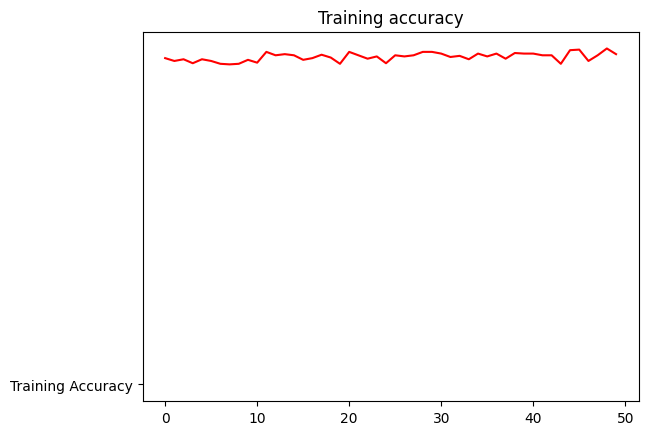

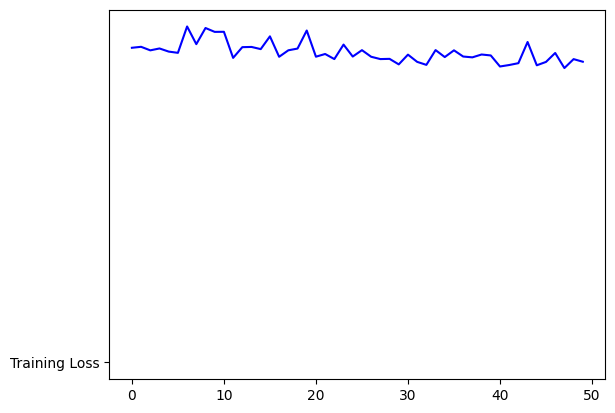

In [30]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
loss=history.history['loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.title('Training accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'b', "Training Loss")
plt.show()